In [87]:
!pip install pandas numpy matplotlib seaborn scikit-learn joblib streamlit


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

%matplotlib inline
sns.set()


In [89]:
df = pd.read_csv("car_data.csv")

df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [90]:
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
df.head()


,car_id,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [91]:
if "carname" in df.columns:
    df["brand"] = df["carname"].apply(lambda x: x.split()[0].lower())

df.head()


,car_id,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [92]:
print(df.shape)
df.info()
df.describe()


(205, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_id            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   carname           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    

,car_id,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [93]:
df.isna().sum()


car_id              0
symboling           0
carname             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
brand               0
dtype: int64

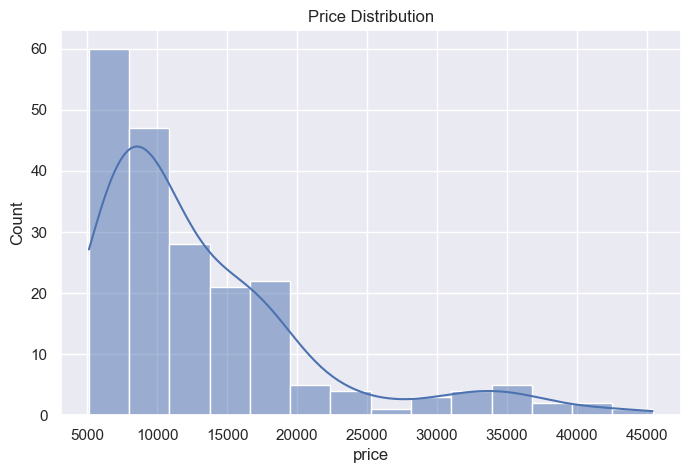

In [94]:
plt.figure(figsize=(8,5))
sns.histplot(df["price"], kde=True)
plt.title("Price Distribution")
plt.show()


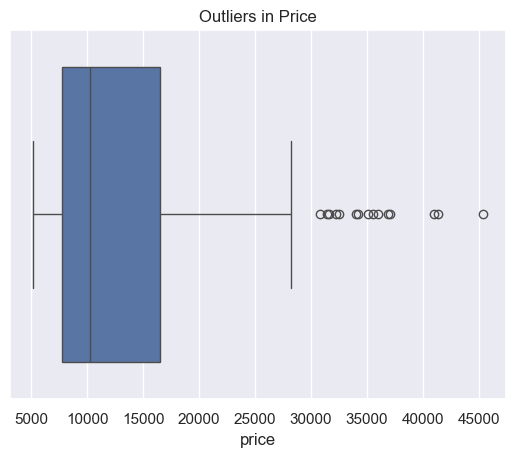

In [95]:
sns.boxplot(x=df["price"])
plt.title("Outliers in Price")
plt.show()


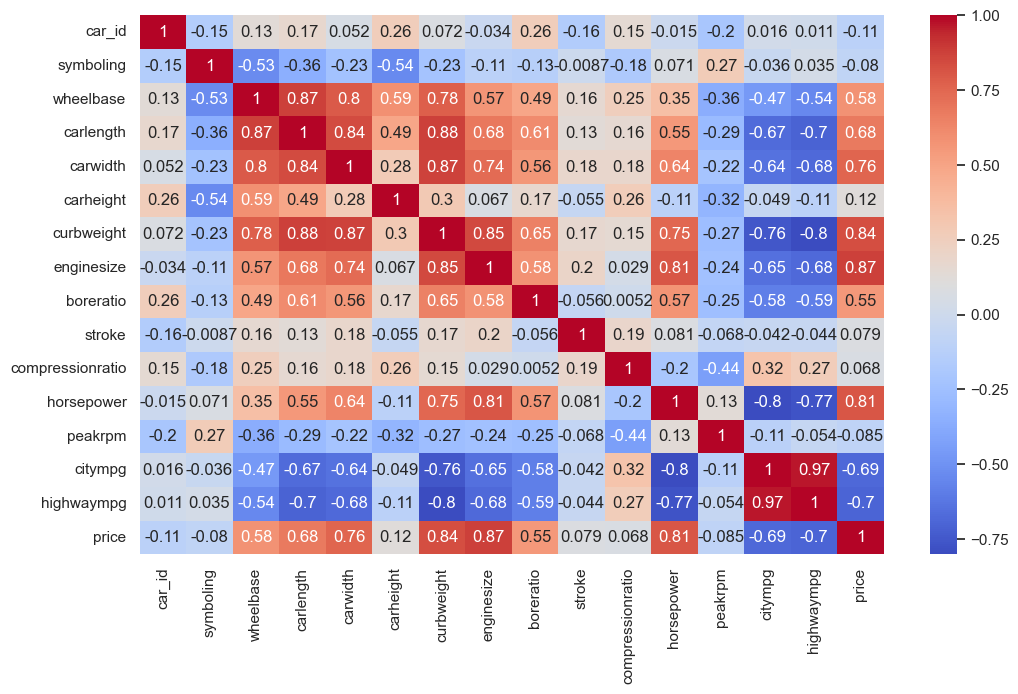

In [96]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12,7))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()


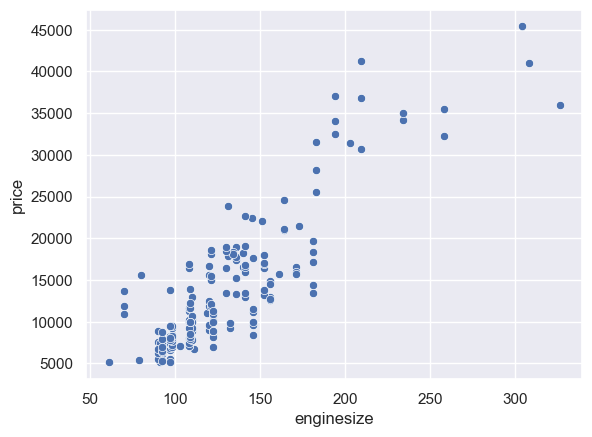

In [97]:
sns.scatterplot(x="enginesize", y="price", data=df)
plt.show()


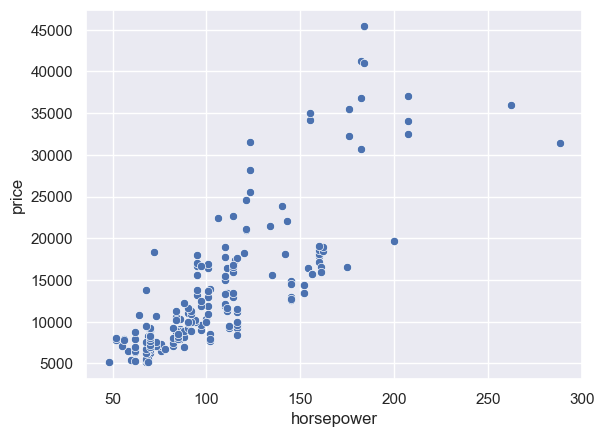

In [98]:
sns.scatterplot(x="horsepower", y="price", data=df)
plt.show()


In [99]:
df.groupby("brand")["price"].mean().sort_values(ascending=False).head(10)


brand
jaguar         34600.000000
buick          33647.000000
porcshce       32528.000000
porsche        31118.625000
bmw            26118.750000
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
toyouta        15750.000000
alfa-romero    15498.333333
Name: price, dtype: float64

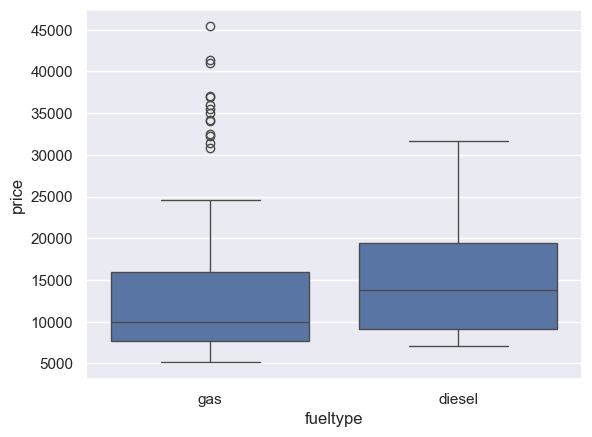

In [100]:
sns.boxplot(x="fueltype", y="price", data=df)
plt.show()


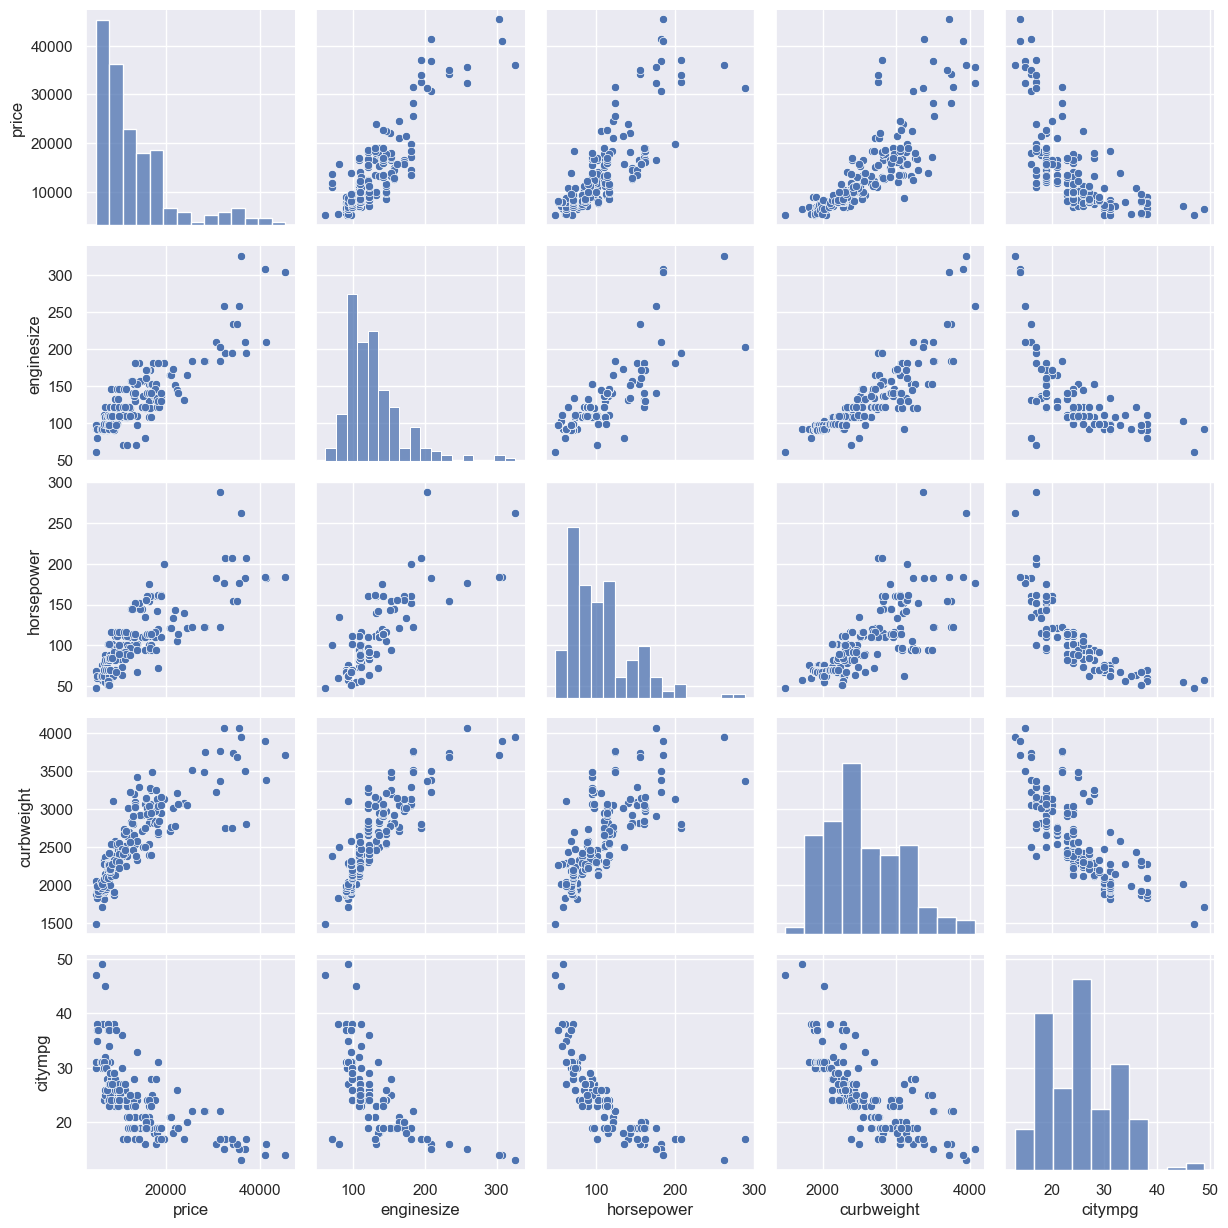

In [101]:
sns.pairplot(df[["price","enginesize","horsepower","curbweight","citympg"]])
plt.show()


In [102]:
from scipy import stats
z = np.abs(stats.zscore(df["price"]))
print("Outliers:", (z > 3).sum())


Outliers: 3


In [103]:
target = "price"

numeric_features = ["enginesize","curbweight","horsepower","citympg","highwaympg"]
categorical_features = ["brand"]

df = df.dropna()

X = df[numeric_features + categorical_features]
y = df[target]


In [104]:
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

model = RandomForestRegressor(n_estimators=120, random_state=42)

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])


In [105]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipeline.fit(X_train, y_train)
print("Model trained!")


Model trained!


In [106]:
y_pred = pipeline.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))


R2 Score: 0.9507738575529202
RMSE: 1971.321794423039
MAE: 1353.4066362756485


In [107]:
joblib.dump(pipeline, "car_price_pipeline.pkl")
print("Model saved as car_price_pipeline.pkl")


Model saved as car_price_pipeline.pkl


In [108]:
print(df.shape)
df.info()
df.head()


(205, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_id            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   carname           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    

,car_id,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [109]:
df.isna().sum()


car_id              0
symboling           0
carname             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
brand               0
dtype: int64

In [110]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
car_id,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


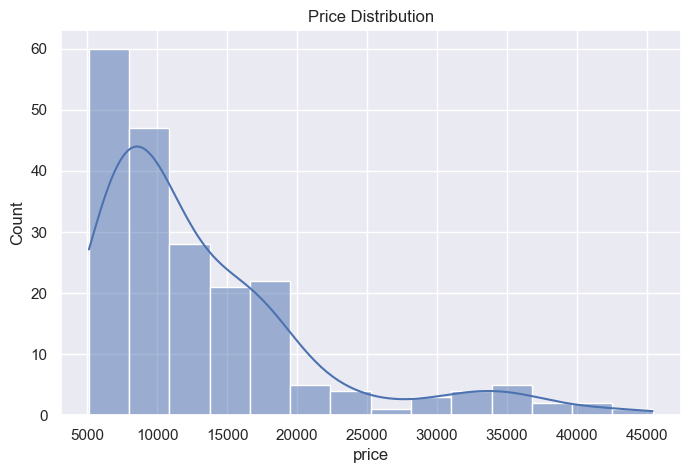

In [111]:
plt.figure(figsize=(8,5))
sns.histplot(df["price"], kde=True)
plt.title("Price Distribution")
plt.show()


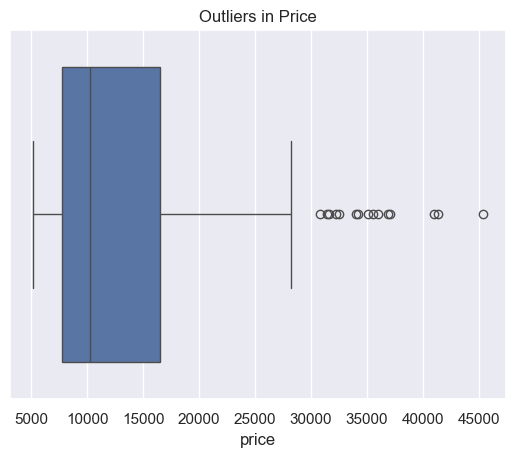

In [112]:
sns.boxplot(x=df["price"])
plt.title("Outliers in Price")
plt.show()


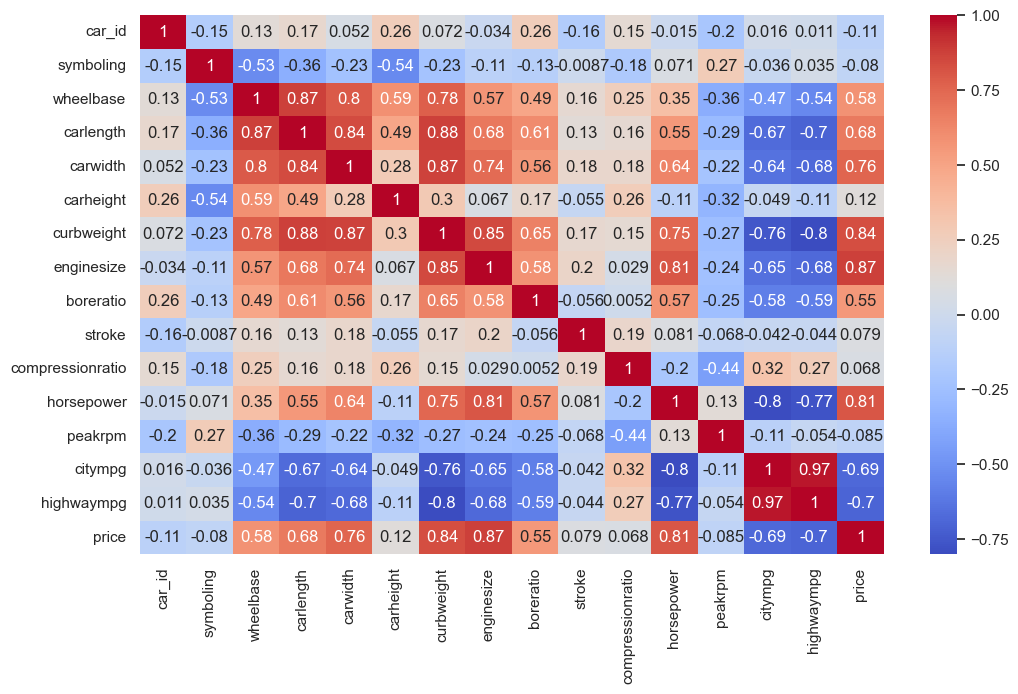

In [113]:
numeric_df = df.select_dtypes(include=["int64","float64"])
plt.figure(figsize=(12,7))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()


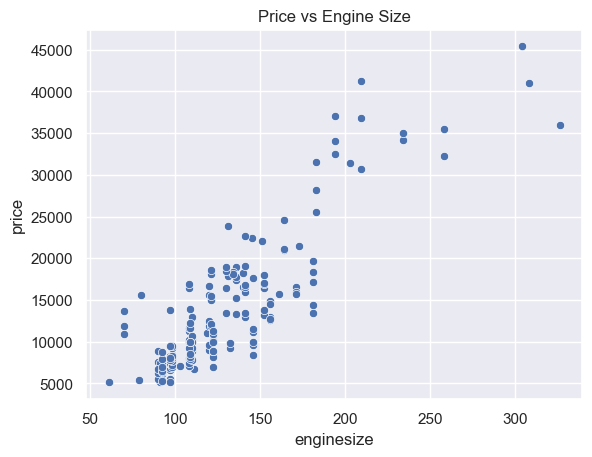

In [114]:
sns.scatterplot(x="enginesize", y="price", data=df)
plt.title("Price vs Engine Size")
plt.show()


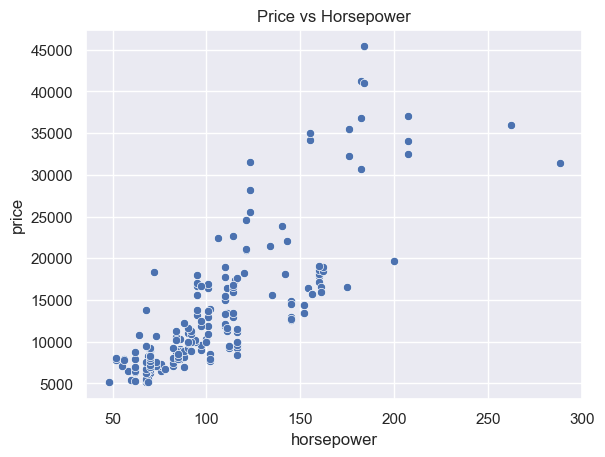

In [115]:
sns.scatterplot(x="horsepower", y="price", data=df)
plt.title("Price vs Horsepower")
plt.show()


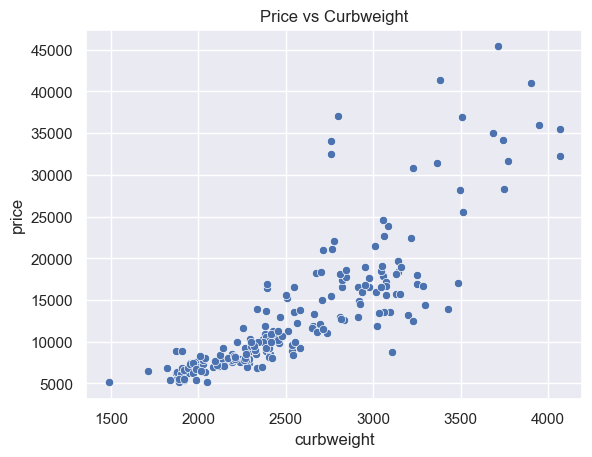

In [116]:
sns.scatterplot(x="curbweight", y="price", data=df)
plt.title("Price vs Curbweight")
plt.show()


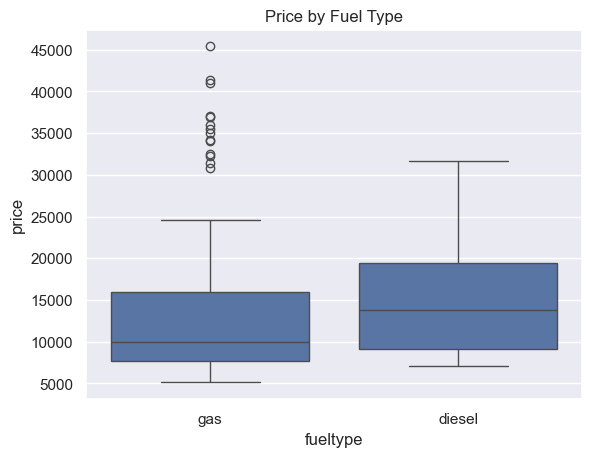

In [117]:
sns.boxplot(x="fueltype", y="price", data=df)
plt.title("Price by Fuel Type")
plt.show()


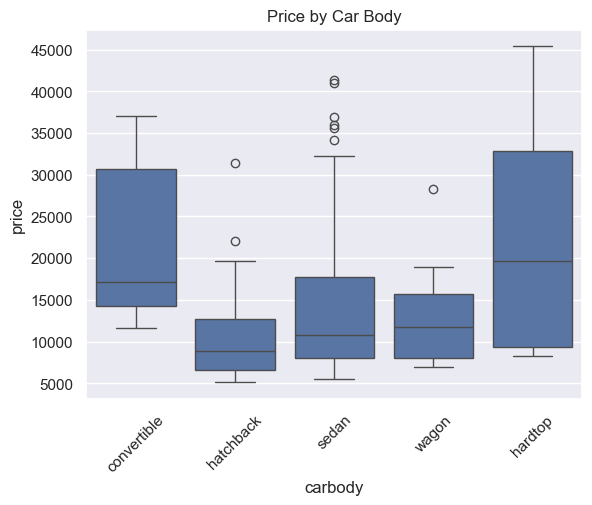

In [118]:
sns.boxplot(x="carbody", y="price", data=df)
plt.xticks(rotation=45)
plt.title("Price by Car Body")
plt.show()


In [119]:
df.groupby("brand")["price"].mean().sort_values(ascending=False).head(15)


brand
jaguar         34600.000000
buick          33647.000000
porcshce       32528.000000
porsche        31118.625000
bmw            26118.750000
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
toyouta        15750.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          11320.600000
vw             10787.500000
nissan         10415.666667
Name: price, dtype: float64

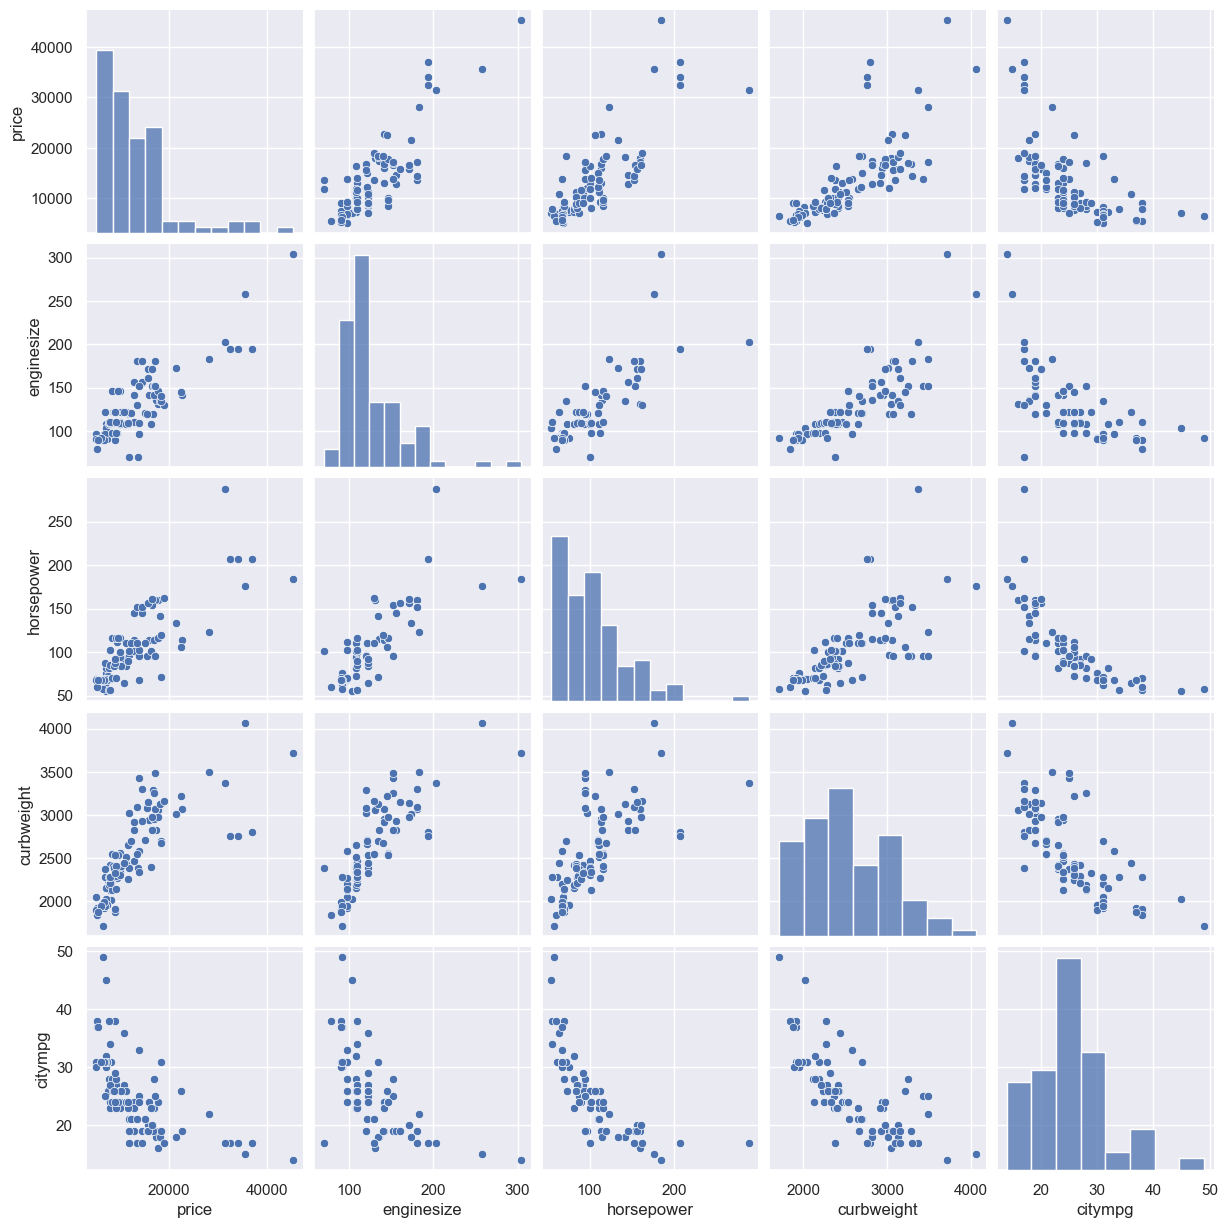

In [120]:
sns.pairplot(df.sample(100)[["price","enginesize","horsepower","curbweight","citympg"]])
plt.show()


In [121]:
from scipy import stats
z_scores = np.abs(stats.zscore(df["price"]))
print("Number of price outliers:", sum(z_scores > 3))


Number of price outliers: 3


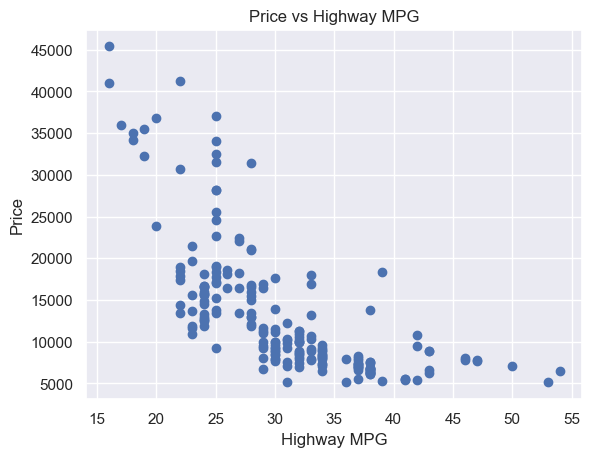

In [124]:
plt.scatter(df["highwaympg"], df["price"])
plt.xlabel("Highway MPG")
plt.ylabel("Price")
plt.title("Price vs Highway MPG")
plt.show()
# Remove the "yes" line


In [125]:
# Target column
target = "price"

# Numeric features (numbers)
numeric_features = ["enginesize", "curbweight", "horsepower", "citympg", "highwaympg"]

# Categorical features (words)
categorical_features = ["brand"]

# Drop any rows with missing values (just to be safe)
df = df.dropna()

# Split dataset into X (features) and y (target)
X = df[numeric_features + categorical_features]
y = df[target]

# Check first 5 rows of X
X.head()


,enginesize,curbweight,horsepower,citympg,highwaympg,brand
0,130,2548,111,21,27,alfa-romero
1,130,2548,111,21,27,alfa-romero
2,152,2823,154,19,26,alfa-romero
3,109,2337,102,24,30,audi
4,136,2824,115,18,22,audi


In [126]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# Numeric transformer: scales numeric features
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# Categorical transformer: converts categories to numbers
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Model
model = RandomForestRegressor(n_estimators=120, random_state=42)

# Full pipeline: preprocessing + model
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

print("Pipeline is ready!")


Pipeline is ready!


In [127]:
from sklearn.model_selection import train_test_split

# Split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (164, 6)
Testing set: (41, 6)


In [128]:
# Train the model
pipeline.fit(X_train, y_train)

print("Model trained successfully!")


Model trained successfully!


In [129]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Predict on test set
y_pred = pipeline.predict(X_test)

# Metrics
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))


R² Score: 0.9507738575529202
RMSE: 1971.321794423039
MAE: 1353.4066362756485


In [132]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# 1️⃣ LOAD THE DATASET FRESHLY
# This fixes the "KeyError" by making sure we have all original columns
df = pd.read_csv('car_data.csv')

# 2️⃣ CREATE THE 'BRAND' COLUMN
# We extract the brand name (e.g., "audi") from the full name (e.g., "audi 100 ls")
df['brand'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())

# Fix spelling mistakes in the dataset
brand_corrections = {
    'maxda': 'mazda', 'porcshce': 'porsche', 'toyouta': 'toyota', 
    'vokswagen': 'volkswagen', 'vw': 'volkswagen'
}
df['brand'] = df['brand'].replace(brand_corrections)

# 3️⃣ DEFINE FEATURES AND TARGET
# We select exactly the features your App expects
features = ['enginesize', 'curbweight', 'horsepower', 'citympg', 'highwaympg', 'brand']
X = df[features]
y = df['price']

# 4️⃣ CREATE THE PIPELINE
# This handles scaling numbers and encoding text automatically
numeric_features = ['enginesize', 'curbweight', 'horsepower', 'citympg', 'highwaympg']
categorical_features = ['brand']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# 5️⃣ SPLIT, TRAIN, AND EVALUATE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("✅ Model trained successfully!")
print(f"R² Score (Accuracy): {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

# 6️⃣ SAVE THE MODEL
joblib.dump(pipeline, "car_price_pipeline.pkl")
print("✅ Model saved as 'car_price_pipeline.pkl'.")

✅ Model trained successfully!
R² Score (Accuracy): 0.88
Mean Squared Error: 9605909.78
✅ Model saved as 'car_price_pipeline.pkl'.
